# I. Numpy

### Импортируйте NumPy

In [87]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [88]:
array = np.zeros(10)
array[4] = 1
array = array.reshape(2,5)
print(array)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]


### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [116]:
array = np.random.randint(10, 49, size=39)
print(array, array[::-1], sep='\n')
even = [i for i in array if i%2==0]
print(even)

[35 25 31 33 13 24 11 33 30 24 24 21 38 10 48 25 13 13 34 33 41 35 29 32
 28 20 32 10 41 15 26 36 22 25 44 13 17 41 18]
[18 41 17 13 44 25 22 36 26 15 41 10 32 20 28 32 29 35 41 33 34 13 13 25
 48 10 38 21 24 24 30 33 11 24 13 33 31 25 35]
[24, 30, 24, 24, 38, 10, 48, 34, 32, 28, 20, 32, 10, 26, 36, 22, 44, 18]


### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [90]:
print(np.arange(9).reshape(3, 3))

[[0 1 2]
 [3 4 5]
 [6 7 8]]


### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [91]:
print(np.random.randint(1, 30, size=(4,3,2)))

[[[ 1  9]
  [24 25]
  [26  1]]

 [[ 1 28]
  [20  9]
  [11 26]]

 [[26 18]
  [14 28]
  [11 18]]

 [[20 27]
  [21 27]
  [19  5]]]


### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [92]:
array_1 =  np.random.randint(1, 30, size=(6,4))
array_2 = np.random.randint(30, 40, size=(4,3))

np.matmul(array_1, array_2)

array([[2596, 2544, 2442],
       [1259, 1230, 1168],
       [3261, 3218, 2956],
       [1358, 1342, 1190],
       [2160, 2134, 1952],
       [2363, 2324, 2082]])

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [93]:
array = np.random.randint(1, 30, size=(7,7))

aver = array.mean()  #среднее

skv = np.nanstd(array)  #стандартное оклонение

norm = np.linalg.norm(array)  #Нормализация
norm_total = np.sum([val/norm for val in array ])

print(aver)
print(skv)
print(norm)

16.632653061224488
7.9454617454885055
129.0310040261642


# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [94]:
import sys
#!{sys.executable} -m pip install seaborn
import matplotlib as mpl
import pandas as pd 
import seaborn as sns
import numpy as np

### Загрузите датасет Tips из набора датасетов seaborn

In [95]:
tips = sns.load_dataset('tips')

### Посмотрите на первые 5 строчек

In [96]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [97]:
print(tips.shape)

(244, 7)


### Проверьте есть ли пропуски в данных

In [98]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

In [99]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Найдите максимальное значение 'total_bill'

In [100]:
tips["total_bill"].max()

50.81

### Найдите количество курящих людей

In [101]:
(tips["smoker"]=="Yes").sum()

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [102]:
tips.groupby("day").total_bill.mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [103]:
tips[tips.total_bill>tips.total_bill.median()].groupby("sex").tip.mean()

sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [104]:
smoker_bin = np.where(tips["smoker"] == "Yes", 1 ,0) 


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

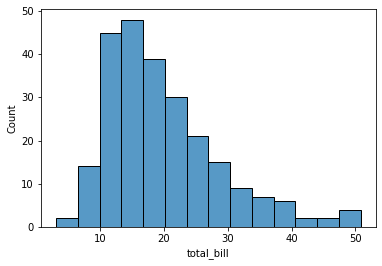

In [105]:
data = tips["total_bill"]
sns.histplot(data)

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

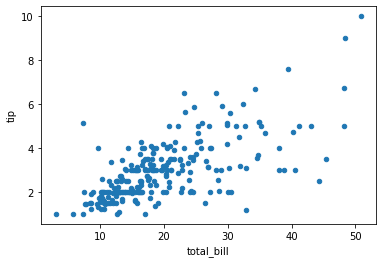

In [106]:
data_scatter = tips[["total_bill","tip"]]
data_scatter.plot.scatter(x="total_bill",y="tip")

### Постройте pairplot

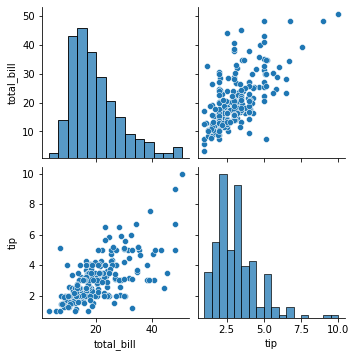

In [107]:
sns.pairplot(data_scatter)

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

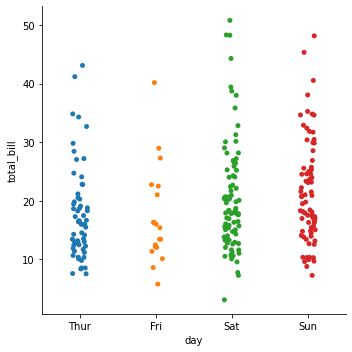

In [108]:
sns.catplot(x="day",y="total_bill",data=tips)

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

<AxesSubplot:ylabel='Frequency'>

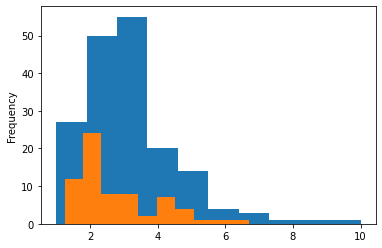

In [109]:
data_dinner = tips.tip[tips.time == "Dinner"]
data_lunch = tips.tip[tips.time == "Lunch"] 

data_dinner.plot(kind="hist")

data_lunch.plot(kind="hist")

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

Male
     total_bill   tip   sex  smoker  day    time  size
1         10.34  1.66  Male       0  Sun  Dinner     3
2         21.01  3.50  Male       0  Sun  Dinner     3
3         23.68  3.31  Male       0  Sun  Dinner     2
5         25.29  4.71  Male       0  Sun  Dinner     4
6          8.77  2.00  Male       0  Sun  Dinner     2
..          ...   ...   ...     ...  ...     ...   ...
236       12.60  1.00  Male       1  Sat  Dinner     2
237       32.83  1.17  Male       1  Sat  Dinner     2
239       29.03  5.92  Male       0  Sat  Dinner     3
241       22.67  2.00  Male       1  Sat  Dinner     2
242       17.82  1.75  Male       0  Sat  Dinner     2

[157 rows x 7 columns]
Female
     total_bill   tip     sex  smoker   day    time  size
0         16.99  1.01  Female       0   Sun  Dinner     2
4         24.59  3.61  Female       0   Sun  Dinner     4
11        35.26  5.00  Female       0   Sun  Dinner     4
14        14.83  3.02  Female       0   Sun  Dinner     2
16        10.3

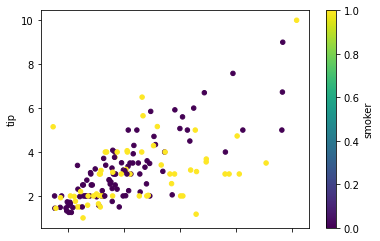

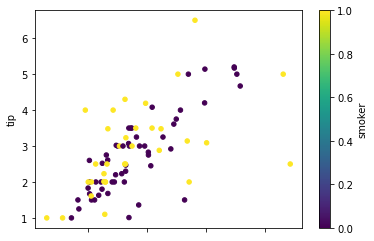

In [110]:

tips["smoker"] = np.where(tips["smoker"] == "Yes", 1 ,0) 

data_scatter_yes = tips.groupby("sex")

for sex, num in data_scatter_yes:
    print(sex)
    print(num)
    num.plot.scatter(x="total_bill",y="tip",c="smoker",cmap="viridis")
data_scatter_yes    

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

In [111]:
Выводы на основе данного датасета:
    1. Средний чек у мужчин в основном не превышает медиану, так же мужчины более щедрые на чаевые
    2. У женщин средний чек более высокий, но чаевые меньше
    3. Курение ни как не влияет на средний чек или чаевые, так же курящих мужчин больше чем женщин

SyntaxError: invalid syntax (Temp/ipykernel_15308/3918927556.py, line 1)